In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.tsa.stattools as ts 

/Users/Malte/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Google SV and Bitcoin WAP

In [2]:
bitcoin_weekly_price = pd.DataFrame.from_csv("Bitcoin Weekly Price Data.csv")
google_queries = pd.DataFrame.from_csv("Google Trends Relative Search Volume.csv")

## 1.1 Correlation of non-transformed data (Non-stationary)

In [3]:
google_queries_and_prices = pd.concat([bitcoin_weekly_price, google_queries], axis=1)
google_queries_and_prices = google_queries_and_prices.drop(["Week"],axis=1)
google_queries_and_prices.head()

,Date,Weekly Average Price,Relative Search Volume
0,2013-04-14,96.677143,6
1,2013-04-21,133.834286,3
2,2013-04-28,121.818571,3
3,2013-05-05,113.905714,2
4,2013-05-12,113.572857,3


### Check linearity and homoscedasticity

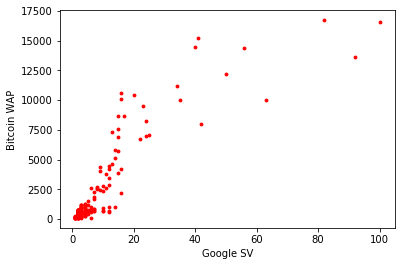

In [4]:
plt.scatter(google_queries_and_prices["Relative Search Volume"],google_queries_and_prices["Weekly Average Price"],c="r", s=8)
plt.xlabel("Google SV")
plt.ylabel("Bitcoin WAP")
plt.show()

### Perform correlation analyis

In [5]:
stats.pearsonr(google_queries_and_prices["Relative Search Volume"], google_queries_and_prices["Weekly Average Price"])

(0.88810995618430433, 2.0416661463680393e-89)

### Cross-Correlation

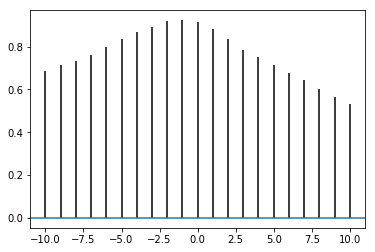

In [6]:
plt.xcorr(google_queries_and_prices["Relative Search Volume"], google_queries_and_prices["Weekly Average Price"])
plt.show()

## 1.2 Correlation of first log differences (stationary)

### Calculate First log differences

In [7]:
bitcoin_weekly_price_log = bitcoin_weekly_price["Weekly Average Price"].apply(np.log)

In [8]:
bitcoin_weekly_price_log_diff = bitcoin_weekly_price_log.diff()
bitcoin_weekly_price_log_diff = bitcoin_weekly_price_log_diff.drop(0)
bitcoin_weekly_price_log_diff.head()

1    0.325225
2   -0.094070
3   -0.067162
4   -0.002926
5    0.068116
Name: Weekly Average Price, dtype: float64

In [9]:
google_queries_log = google_queries["Relative Search Volume"].apply(np.log)
google_queries_log_diff = google_queries_log.diff()
google_queries_log_diff = google_queries_log_diff.drop(0)
google_queries_log_diff.head()

1   -0.693147
2    0.000000
3   -0.405465
4    0.405465
5   -0.405465
Name: Relative Search Volume, dtype: float64

### Check linearity and homoscedasticity

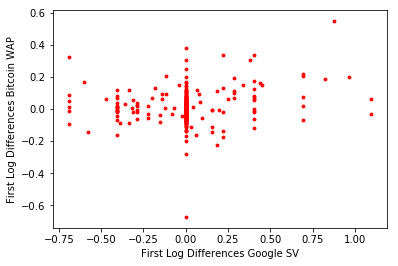

In [10]:
plt.scatter(google_queries_log_diff, bitcoin_weekly_price_log_diff,c="r", s=8)
plt.xlabel("First Log Differences Google SV")
plt.ylabel("First Log Differences Bitcoin WAP")
plt.show()

### Perform correlation analysis

In [11]:
stats.pearsonr(google_queries_log_diff, bitcoin_weekly_price_log_diff)

(0.19818411725323415, 0.0013174766061584639)

### Cross-Correlation

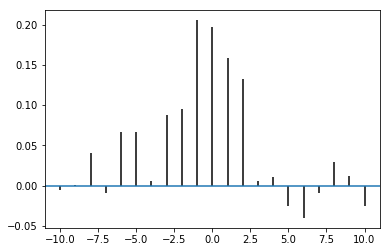

In [12]:
plt.xcorr(google_queries_log_diff, bitcoin_weekly_price_log_diff)
plt.show()

## 1.3 Cointegration Test (non-transformed, non-stationary data)

In [13]:
coin_result = ts.coint(google_queries_and_prices["Relative Search Volume"], google_queries_and_prices["Weekly Average Price"] )

In [14]:
coin_result

(-4.0841366736360332,
 0.0054279745251399709,
 array([-3.93905865, -3.35973132, -3.06080254]))

# 2. Wikipedia PV and Bitcoin DP

In [15]:
bitcoin_daily_price = pd.DataFrame.from_csv("Bitcoin Daily Price Data.csv")
wikipedia_pageviews = pd.DataFrame.from_csv("Wikipedia Pageview Data.csv")

## 2.1 Correlation of non-transformed data (non-stationary)

In [16]:
wikipedia_pageviews_and_prices = pd.concat([bitcoin_daily_price, wikipedia_pageviews], axis=1)
wikipedia_pageviews_and_prices.head()

,Date,Daily Closing Price,Pageviews
0,2015-07-01,257.62,12957
1,2015-07-02,254.54,9802
2,2015-07-03,255.92,8307
3,2015-07-04,260.20,8947
4,2015-07-05,271.50,8692


### Check linearity and homoscedasticity

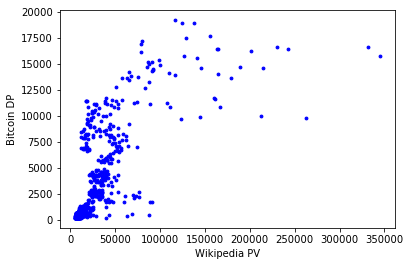

In [17]:
plt.scatter(wikipedia_pageviews_and_prices["Pageviews"],wikipedia_pageviews_and_prices["Daily Closing Price"],c="b", s=8)
plt.xlabel("Wikipedia PV")
plt.ylabel("Bitcoin DP")
plt.show()

### Perform correlation analysis

In [18]:
stats.pearsonr(wikipedia_pageviews_and_prices["Pageviews"], wikipedia_pageviews_and_prices["Daily Closing Price"])

(0.74684762455222131, 2.1430565248787305e-182)

### Cross-Correlation

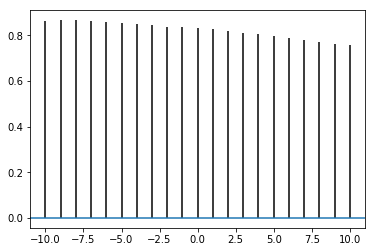

In [19]:
plt.xcorr(wikipedia_pageviews_and_prices["Pageviews"], wikipedia_pageviews_and_prices["Daily Closing Price"])
plt.show()

## 2.2 Correlation of first log differences (stationary)

### Calculate First Log Differences

In [20]:
bitcoin_daily_price_log = bitcoin_daily_price["Daily Closing Price"].apply(np.log)
bitcoin_daily_price_log_diff = bitcoin_daily_price_log.diff()
bitcoin_daily_price_log_diff = bitcoin_daily_price_log_diff.drop(0)
bitcoin_daily_price_log_diff.head()

1   -0.012028
2    0.005407
3    0.016586
4    0.042512
5   -0.011074
Name: Daily Closing Price, dtype: float64

In [21]:
wikipedia_pageviews_log = wikipedia_pageviews["Pageviews"].apply(np.log)
wikipedia_pageviews_log_diff = wikipedia_pageviews_log.diff()
wikipedia_pageviews_log_diff = wikipedia_pageviews_log_diff.drop(0)
wikipedia_pageviews_log_diff.head()

1   -0.279050
2   -0.165488
3    0.074220
4   -0.028915
5    0.166142
Name: Pageviews, dtype: float64

### Check linearity and homoscedasticity

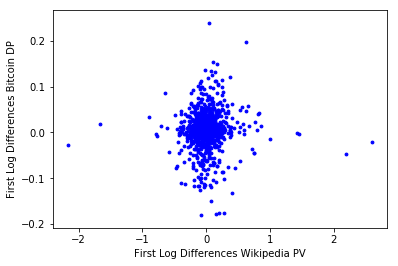

In [22]:
plt.scatter(wikipedia_pageviews_log_diff, bitcoin_daily_price_log_diff,c="b", s=8)
plt.xlabel("First Log Differences Wikipedia PV")
plt.ylabel("First Log Differences Bitcoin DP")
plt.show()

### Perform correlation analysis

In [23]:
stats.pearsonr(wikipedia_pageviews_log_diff, bitcoin_daily_price_log_diff)

(0.043786800334480215, 0.16270855886028196)

### Cross-Correlation

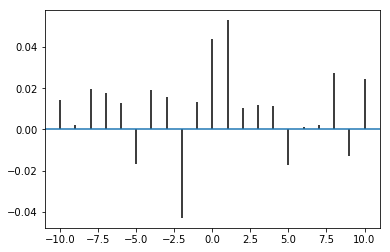

In [24]:
plt.xcorr(wikipedia_pageviews_log_diff,bitcoin_daily_price_log_diff )
plt.show()

## 2.3 Cointegration test (non-transformed, non-stationary data)

In [25]:
coin_result = ts.coint(wikipedia_pageviews_and_prices["Pageviews"], wikipedia_pageviews_and_prices["Daily Closing Price"] )

In [26]:
coin_result

(-3.9000515305160421,
 0.0099177728612577145,
 array([-3.9072306 , -3.34213865, -3.04861883]))

# 3. Control Variable: Google SV Worldwide and Bitcoin WAP

In [27]:
bitcoin_weekly_price = pd.DataFrame.from_csv("Bitcoin Weekly Price Data.csv")
google_queries_worldwide = pd.DataFrame.from_csv("Google Trends Relative Search Volume Worldwide.csv")

## 3.1 Correlation of non-transformed data (Non-stationary)

In [28]:
google_queries_and_prices = pd.concat([bitcoin_weekly_price, google_queries_worldwide], axis=1)
google_queries_and_prices = google_queries_and_prices.drop(["Week"],axis=1)
google_queries_and_prices.head()

,Date,Weekly Average Price,Relative Search Volume Worldwide
0,2013-04-14,96.677143,6
1,2013-04-21,133.834286,3
2,2013-04-28,121.818571,3
3,2013-05-05,113.905714,3
4,2013-05-12,113.572857,2


### Check linearity and homoscedasticity

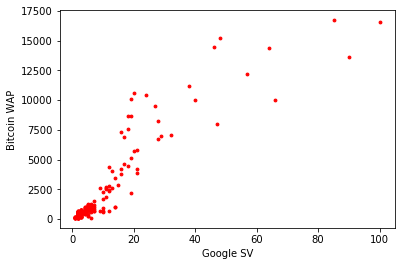

In [29]:
plt.scatter(google_queries_and_prices["Relative Search Volume Worldwide"],google_queries_and_prices["Weekly Average Price"],c="r", s=8)
plt.xlabel("Google SV")
plt.ylabel("Bitcoin WAP")
plt.show()

### Perform correlation analyis

In [30]:
stats.pearsonr(google_queries_and_prices["Relative Search Volume Worldwide"], google_queries_and_prices["Weekly Average Price"])

(0.91821104590078528, 3.6362967966989796e-106)

### Cross-Correlation

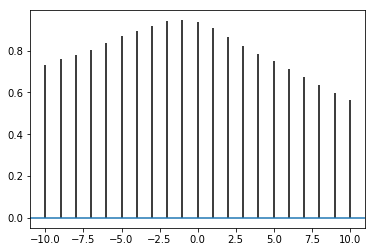

In [31]:
plt.xcorr(google_queries_and_prices["Relative Search Volume Worldwide"], google_queries_and_prices["Weekly Average Price"])
plt.show()

## 3.2 Correlation of first log differences (stationary)

### Calculate First log differences

In [32]:
bitcoin_weekly_price_log = bitcoin_weekly_price["Weekly Average Price"].apply(np.log)

In [33]:
bitcoin_weekly_price_log_diff = bitcoin_weekly_price_log.diff()
bitcoin_weekly_price_log_diff = bitcoin_weekly_price_log_diff.drop(0)
bitcoin_weekly_price_log_diff.head()

1    0.325225
2   -0.094070
3   -0.067162
4   -0.002926
5    0.068116
Name: Weekly Average Price, dtype: float64

In [34]:
google_queries_worldwide_log = google_queries_worldwide["Relative Search Volume Worldwide"].apply(np.log)
google_queries_worldwide_log_diff = google_queries_worldwide_log.diff()
google_queries_worldwide_log_diff = google_queries_worldwide_log_diff.drop(0)
google_queries_worldwide_log_diff.head()

1   -0.693147
2    0.000000
3    0.000000
4   -0.405465
5    0.000000
Name: Relative Search Volume Worldwide, dtype: float64

### Check linearity and homoscedasticity

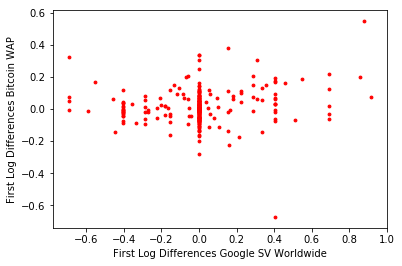

In [35]:
plt.scatter(google_queries_worldwide_log_diff, bitcoin_weekly_price_log_diff,c="r", s=8)
plt.xlabel("First Log Differences Google SV Worldwide")
plt.ylabel("First Log Differences Bitcoin WAP")
plt.show()

### Perform correlation analysis

In [36]:
stats.pearsonr(google_queries_worldwide_log_diff, bitcoin_weekly_price_log_diff)

(0.1496528432955711, 0.015732261827306481)

### Cross-Correlation

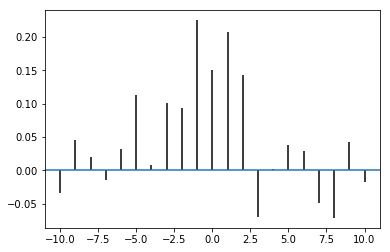

In [37]:
plt.xcorr(google_queries_worldwide_log_diff, bitcoin_weekly_price_log_diff)
plt.show()

## 3.3 Cointegration Test (non-transformed, non-stationary data)

In [38]:
coin_result = ts.coint(google_queries_and_prices["Relative Search Volume Worldwide"], google_queries_and_prices["Weekly Average Price"] )

In [39]:
coin_result

(-4.1863054594922016,
 0.0038260057878945113,
 array([-3.93905865, -3.35973132, -3.06080254]))